In [1]:
import pandas as pd
# import timesynth as ts
import matplotlib.pyplot as plt
import scipy.fftpack
from scipy import signal
import numpy as np

### Finding Seasonality

In [2]:
co2 = pd.read_csv('/home/aumaron/Desktop/other_projects/datasets/TS_CO2_Data.csv')
co2 = co2.values.flatten()

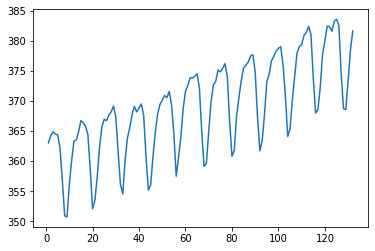

In [3]:
plt.plot(np.arange(1, len(co2)+1), co2)
plt.show()

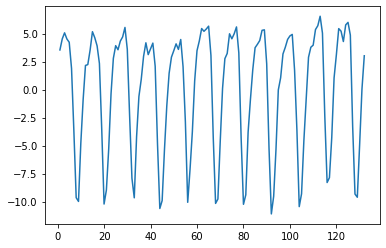

In [4]:
# Detrending the signal
detrended_co2 = signal.detrend(co2, type='linear', overwrite_data=False)

plt.plot(np.arange(1, len(detrended_co2)+1), detrended_co2)
plt.show()

#### I will be subtracting the mean before computing the Fourier transform. If not, there would be a large value at zero frequency. The Fourier transform of the residuals is plotted below.

132


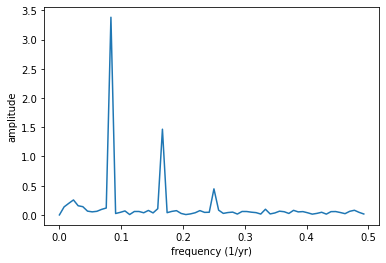

In [5]:
amplitude = scipy.fftpack.fft(detrended_co2 - detrended_co2.mean())
freqs = scipy.fftpack.fftfreq(len(amplitude),1) # t[1] - t[0])
print(len(freqs))

# Only plot first half...remove aliasing/ nyquist frequency
plt.plot(freqs[:len(amplitude)//2], np.abs(amplitude[:len(amplitude)//2])/len(amplitude));
plt.xlabel('frequency (1/yr)')
plt.ylabel('amplitude');

In [6]:
amplitude

array([ 0.00000000e+00  -0.j        ,  1.05894818e+01 +14.72041556j,
        1.89870413e+01 +17.98754112j, -2.78207387e+01 +19.1643995j ,
       -2.89703211e+00 +20.49321091j,  7.08632043e+00 -17.18652038j,
       -8.36778682e+00  -1.66246489j,  5.82371481e+00  -3.73060481j,
       -1.22914828e+00  +8.0534042j ,  1.19517980e+01  +3.49671717j,
       -1.40214876e+01  -6.76509699j,  2.53607205e+02-367.20919327j,
        2.15507249e+00  +2.35792633j,  4.29149032e+00  -3.91031539j,
        6.66158017e+00  -6.01006497j,  4.86317838e-01  -0.71748747j,
       -1.37105027e+00  +7.61178265j,  7.32795144e+00  -2.52081778j,
        4.53980620e+00  -1.71663938j,  4.51766368e+00  -9.04082648j,
        2.00487882e+00  -4.08447126j,  1.21772499e+01  +6.9761428j ,
       -6.18259370e+00+193.38796508j,  1.69849579e+00  -4.75989641j,
       -7.64469118e-01  +7.89834209j, -9.05114146e+00  +3.2508414j ,
       -2.54409545e+00  +2.07522496j, -4.31144392e-01  +0.69035817j,
       -3.56361524e-01  +2.3121097

#### Now finding the frequency corresponding to the highest observed amplitude

In [14]:
freqs[np.argmax(amplitude)]

-0.08333333333333334

The reciprocal will give us the frequency | However, as the series is not de-trended, the results are incorrect

In [15]:
1/ abs(freqs[np.argmax(amplitude)])

11.999999999999998